Input Rate (Pre-Synaptic Neuron): 1000.00 Hz
Synaptic Strength: 1
E/I Ratio: 1
Firing Rate (Post-Synaptic Neuron): 10.00 Hz

Input Rate (Pre-Synaptic Neuron): 1000.00 Hz
Synaptic Strength: 1
E/I Ratio: 3
Firing Rate (Post-Synaptic Neuron): 25.00 Hz

Input Rate (Pre-Synaptic Neuron): 1000.00 Hz
Synaptic Strength: 5
E/I Ratio: 1
Firing Rate (Post-Synaptic Neuron): 15.00 Hz

Input Rate (Pre-Synaptic Neuron): 1000.00 Hz
Synaptic Strength: 5
E/I Ratio: 3
Firing Rate (Post-Synaptic Neuron): 60.00 Hz



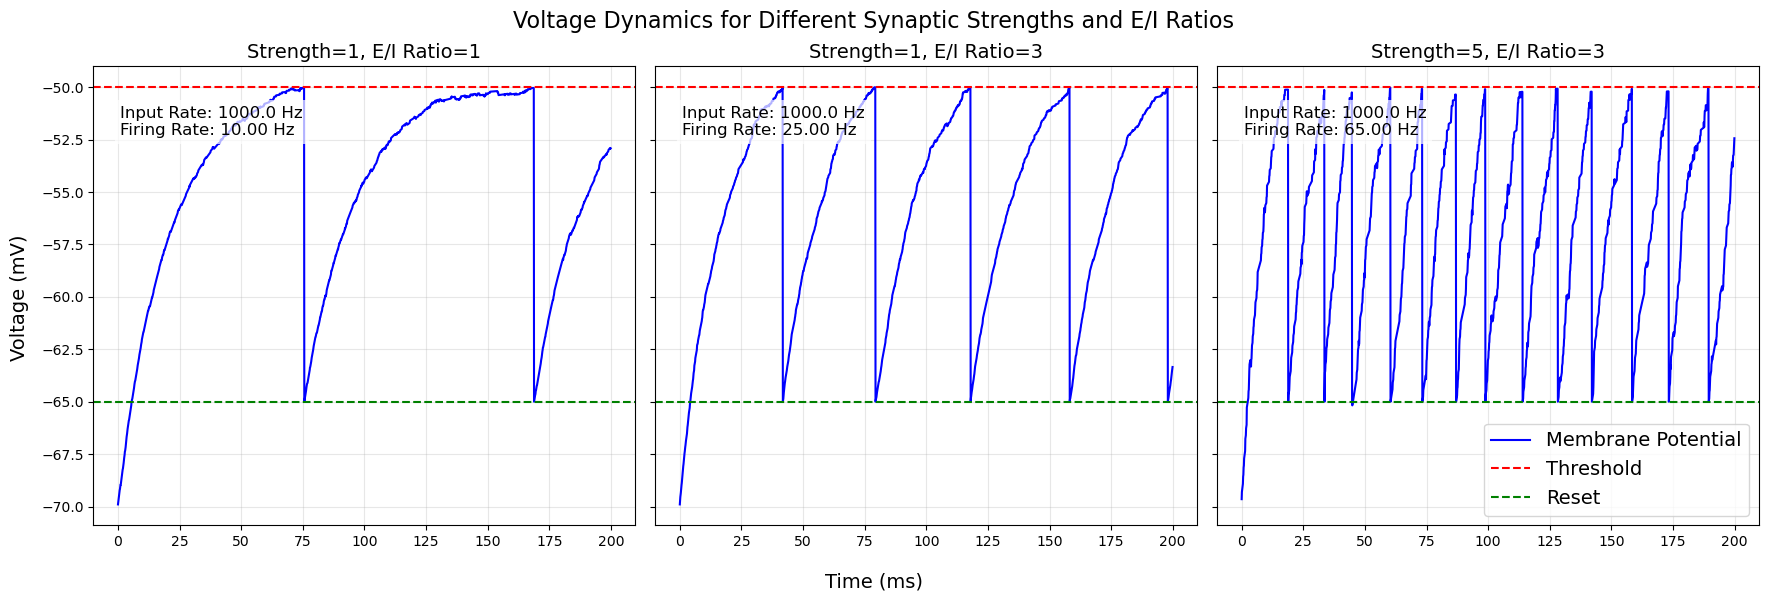

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the LIF neuron
E_L = -70.0  # Leak potential (mV)
V_reset = -65.0  # Reset potential after spike (mV)
V_threshold = -50.0  # Spike threshold (mV)
tau_m = 20.0  # Membrane time constant (ms)
R_m = 10.0  # Membrane resistance (MΩ)
dt = 0.1  # Time step (ms)
T = 200.0  # Total simulation time (ms)
time = np.arange(0, T, dt)  # Time array
bias_current = 2  # Constant depolarizing current (nA)
input_rate = 1000.0  # Initial input rate (Hz)
target_firing_rate = 35.0  # Target post-synaptic firing rate in Hz
tolerance = 0.5  # Allowable deviation from the target rate (Hz)

# Function to simulate the LIF neuron
def simulate_lif_neuron(synaptic_strength, exc_inh_ratio, input_rate):
    V = E_L  # Initialize membrane potential
    spikes = []  # List to store spike times
    voltages = []  # Store membrane potential for plotting

    # Generate Poisson input for excitatory and inhibitory inputs
    exc_rate = input_rate * exc_inh_ratio
    inh_rate = input_rate / exc_inh_ratio
    exc_input = np.random.poisson(exc_rate * dt / 1000.0, len(time))
    inh_input = np.random.poisson(inh_rate * dt / 1000.0, len(time))

    for t_idx, t in enumerate(time):
        # Compute synaptic current
        I_e = synaptic_strength * (exc_input[t_idx] - inh_input[t_idx]) + bias_current

        # Update membrane potential using Euler's method
        dV = ((E_L - V) + R_m * I_e) * (dt / tau_m)
        V += dV

        # Check if threshold is reached
        if V >= V_threshold:
            spikes.append(t)  # Record spike time
            V = V_reset  # Reset potential

        # Store the voltage for plotting
        voltages.append(V)

    return np.array(voltages), spikes

# Function to calculate the firing rate of the post-synaptic neuron
def calculate_firing_rate(spike_times, simulation_time):
    return len(spike_times) / (simulation_time / 1000.0)  # Convert ms to seconds

# Synaptic strengths and E/I ratios to test
synaptic_strengths = [1, 5]
exc_inh_ratios = [1, 3]

# Simulate and print results
for synaptic_strength in synaptic_strengths:
    for exc_inh_ratio in exc_inh_ratios:
        voltages, spikes = simulate_lif_neuron(synaptic_strength, exc_inh_ratio, input_rate)
        firing_rate = calculate_firing_rate(spikes, T)
        
        print(f"Input Rate (Pre-Synaptic Neuron): {input_rate:.2f} Hz")
        print(f"Synaptic Strength: {synaptic_strength}")
        print(f"E/I Ratio: {exc_inh_ratio}")
        print(f"Firing Rate (Post-Synaptic Neuron): {firing_rate:.2f} Hz\n")

# Create three horizontally stacked subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# Define the parameter combinations for each subplot
combinations = [
    (synaptic_strengths[0], exc_inh_ratios[0]),  # First strength, first E/I ratio
    (synaptic_strengths[0], exc_inh_ratios[1]),  # First strength, second E/I ratio
    (synaptic_strengths[1], exc_inh_ratios[1])   # Second strength, second E/I ratio
]

for ax, (synaptic_strength, exc_inh_ratio) in zip(axes, combinations):
    # Simulate the LIF neuron
    voltages, spikes = simulate_lif_neuron(synaptic_strength, exc_inh_ratio, input_rate)

    # Calculate firing rate
    firing_rate = calculate_firing_rate(spikes, T)

    # Plot membrane potential
    ax.plot(time, voltages, label="Membrane Potential", color="blue")
    ax.axhline(V_threshold, color="red", linestyle="--", label="Threshold")
    ax.axhline(V_reset, color="green", linestyle="--", label="Reset")

    # Annotate input rate and firing rate on the plot
    ax.text(
        0.05, 0.85, 
        f"Input Rate: {input_rate:.1f} Hz\nFiring Rate: {firing_rate:.2f} Hz", 
        transform=ax.transAxes, 
        fontsize=12, 
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
    )

    # Add subplot title
    ax.set_title(f"Strength={synaptic_strength}, E/I Ratio={exc_inh_ratio}", fontsize=14)

    # Customize grid and legend
    ax.grid(alpha=0.3)

# Add shared x-axis and y-axis labels
fig.supxlabel("Time (ms)", fontsize=14)
fig.supylabel("Voltage (mV)", fontsize=14)

# Add legend to the last subplot
handles, labels = axes[-1].get_legend_handles_labels()
axes[-1].legend(handles, labels, loc="best", fontsize=14)

# Adjust layout and show plot
plt.tight_layout(rect=[0.01, 0, 1, 0.95])
plt.suptitle("Voltage Dynamics for Different Synaptic Strengths and E/I Ratios", fontsize=16)
plt.show()


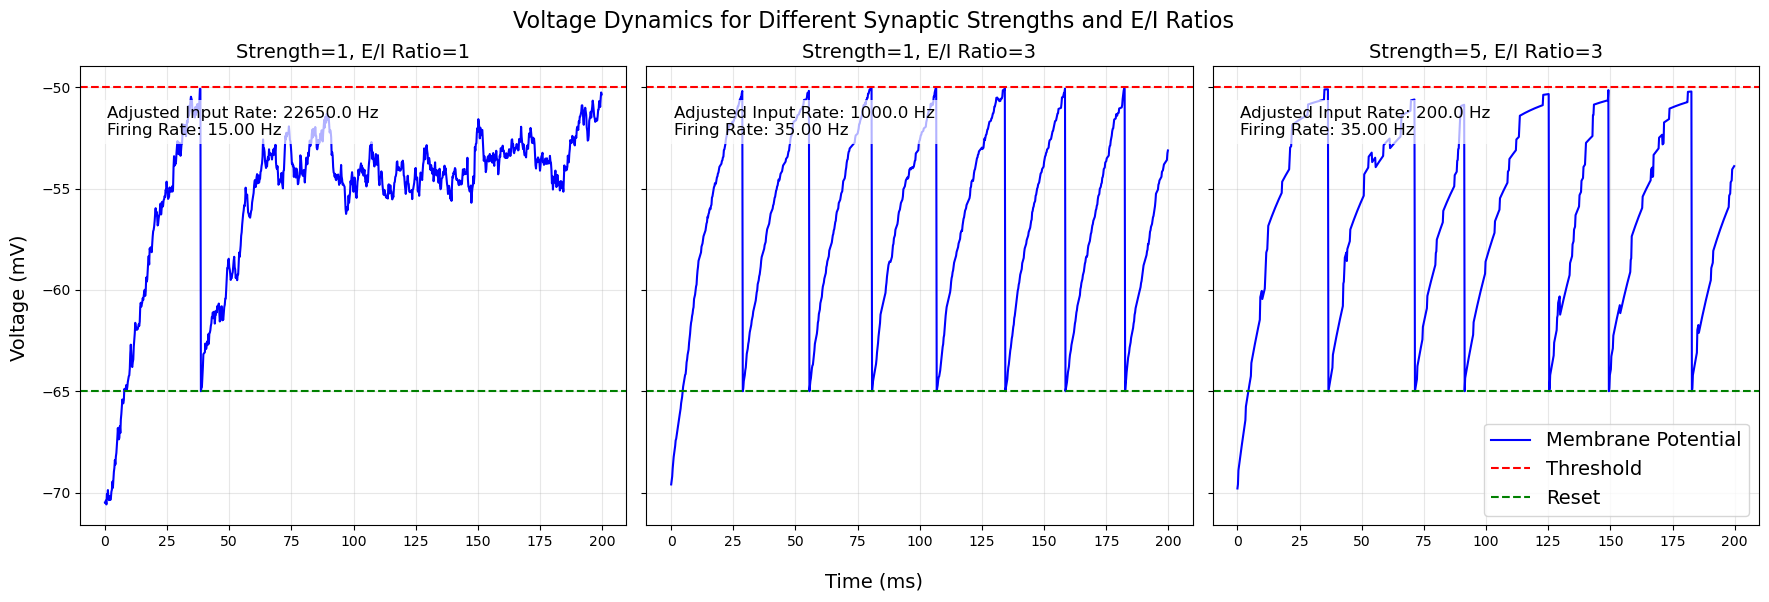

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the LIF neuron
E_L = -70.0  # Leak potential (mV)
V_reset = -65.0  # Reset potential after spike (mV)
V_threshold = -50.0  # Spike threshold (mV)
tau_m = 20.0  # Membrane time constant (ms)
R_m = 10.0  # Membrane resistance (MΩ)
dt = 0.2  # Time step (ms)
T = 200.0  # Total simulation time (ms)
time = np.arange(0, T, dt)  # Time array
bias_current = 2  # Constant depolarizing current (nA)
tolerance = 0.5  # Allowable deviation from the target rate (Hz)

# Function to simulate the LIF neuron
def simulate_lif_neuron(synaptic_strength, exc_inh_ratio, input_rate):
    V = E_L  # Initialize membrane potential
    spikes = []  # List to store spike times
    voltages = []  # Store membrane potential for plotting

    # Generate Poisson input for excitatory and inhibitory inputs
    exc_rate = input_rate * exc_inh_ratio
    inh_rate = input_rate / exc_inh_ratio
    exc_input = np.random.poisson(exc_rate * dt / 1000.0, len(time))
    inh_input = np.random.poisson(inh_rate * dt / 1000.0, len(time))

    for t_idx, t in enumerate(time):
        # Compute synaptic current
        I_e = synaptic_strength * (exc_input[t_idx] - inh_input[t_idx]) + bias_current

        # Update membrane potential using Euler's method
        dV = ((E_L - V) + R_m * I_e) * (dt / tau_m)
        V += dV

        # Check if threshold is reached
        if V >= V_threshold:
            spikes.append(t)  # Record spike time
            V = V_reset  # Reset potential

        # Store the voltage for plotting
        voltages.append(V)

    return np.array(voltages), spikes

# Function to calculate the firing rate of the post-synaptic neuron
def calculate_firing_rate(spike_times, simulation_time):
    return len(spike_times) / (simulation_time / 1000.0)  # Convert ms to seconds

def adjust_input_rate_to_target(target_firing_rate, synaptic_strength, exc_inh_ratio, initial_rate=1000.0, tolerance=0.5, max_iters=100):
    input_rate = initial_rate  # Start with an initial input rate
    for _ in range(max_iters):
        # Simulate the LIF neuron with the current input rate
        _, spikes = simulate_lif_neuron(synaptic_strength, exc_inh_ratio, input_rate)  # Use only the spike times
        
        # Calculate the post-synaptic firing rate
        firing_rate = calculate_firing_rate(spikes, T)
        
        # Check if the firing rate is within the target tolerance
        if abs(firing_rate - target_firing_rate) <= tolerance:
            return input_rate, firing_rate
        
        # Dynamically adjust the input rate based on the difference
        adjustment = (target_firing_rate - firing_rate) * 10.0  # Adjust factor for convergence
        input_rate += adjustment

        # Ensure the input rate remains positive
        input_rate = max(input_rate, 1.0)

    # Return the best attempt if the target rate isn't achieved
    return input_rate, firing_rate

# Synaptic strengths and E/I ratios to test
synaptic_strengths = [1, 5]
exc_inh_ratios = [1, 3]

# Create three horizontally stacked subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)

# Define the parameter combinations for each subplot
combinations = [
    (synaptic_strengths[0], exc_inh_ratios[0]),  # First strength, first E/I ratio
    (synaptic_strengths[0], exc_inh_ratios[1]),  # First strength, second E/I ratio
    (synaptic_strengths[1], exc_inh_ratios[1])   # Second strength, second E/I ratio
]

# Loop through the combinations and plot on each subplot
for ax, (synaptic_strength, exc_inh_ratio) in zip(axes, combinations):
    # Adjust input rate to achieve the target firing rate
    adjusted_input_rate, final_firing_rate = adjust_input_rate_to_target(
        target_firing_rate, synaptic_strength, exc_inh_ratio, initial_rate=1000.0, tolerance=0.5
    )

    # Simulate the LIF neuron with the adjusted input rate
    voltages, spikes = simulate_lif_neuron(synaptic_strength, exc_inh_ratio, adjusted_input_rate)

    # Plot membrane potential
    ax.plot(time, voltages, label="Membrane Potential", color="blue")
    ax.axhline(V_threshold, color="red", linestyle="--", label="Threshold")
    ax.axhline(V_reset, color="green", linestyle="--", label="Reset")

    # Annotate input rate and firing rate on the plot
    ax.text(
        0.05, 0.85, 
        f"Adjusted Input Rate: {adjusted_input_rate:.1f} Hz\nFiring Rate: {final_firing_rate:.2f} Hz", 
        transform=ax.transAxes, 
        fontsize=12, 
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none')
    )

    # Add subplot title
    ax.set_title(f"Strength={synaptic_strength}, E/I Ratio={exc_inh_ratio}", fontsize=14)

    # Customize grid and legend
    ax.grid(alpha=0.3)

# Add shared x-axis and y-axis labels
fig.supxlabel("Time (ms)", fontsize=14)
fig.supylabel("Voltage (mV)", fontsize=14)

# Add legend to the last subplot
handles, labels = axes[-1].get_legend_handles_labels()
axes[-1].legend(handles, labels, loc="best", fontsize=14)

# Adjust layout and show plot
plt.tight_layout(rect=[0.01, 0, 1, 0.95])
plt.suptitle("Voltage Dynamics for Different Synaptic Strengths and E/I Ratios", fontsize=16)
plt.show()


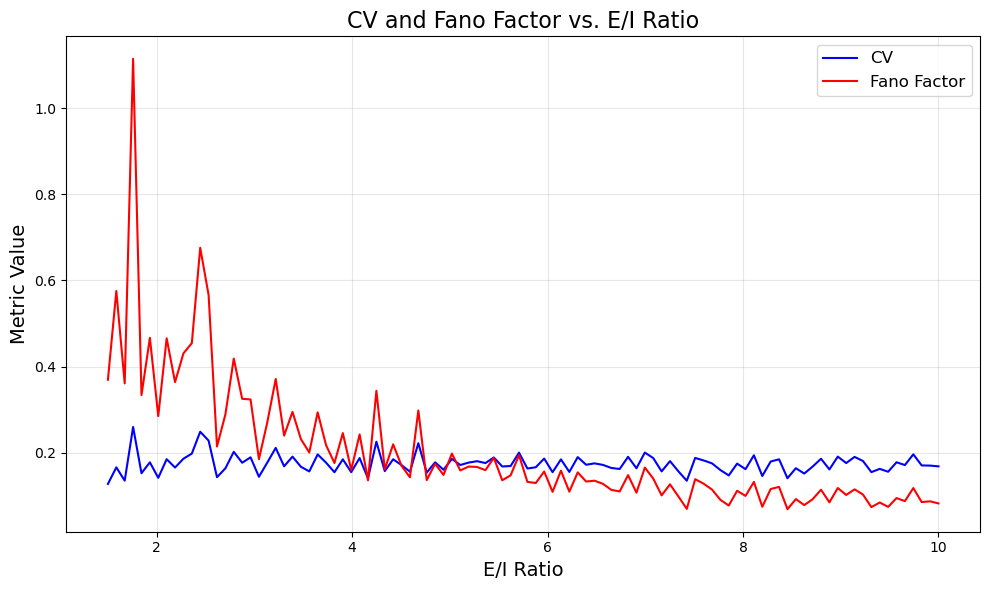

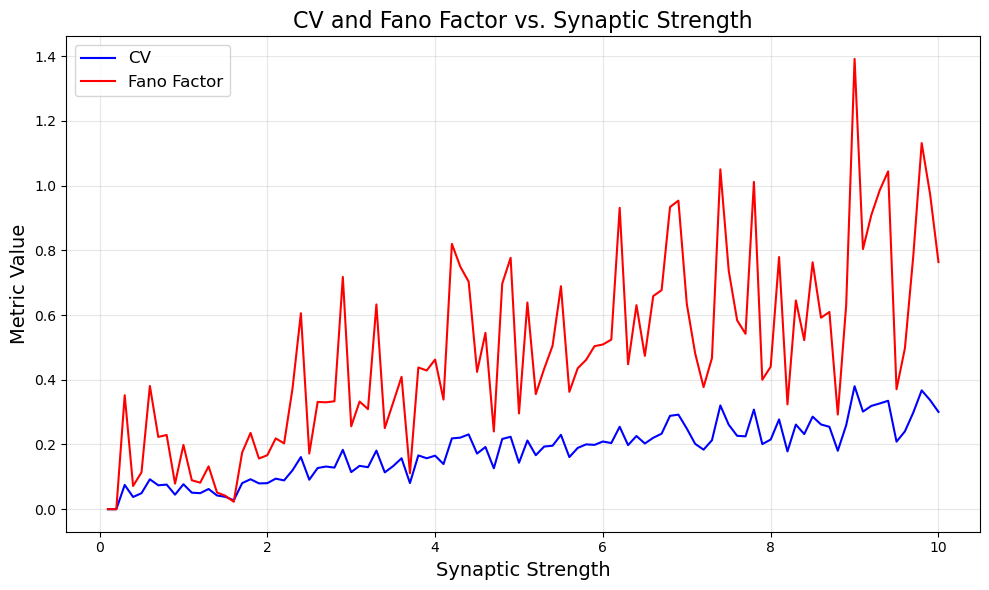

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the LIF neuron
E_L = -70.0  # Leak potential (mV)
V_reset = -65.0  # Reset potential after spike (mV)
V_threshold = -50.0  # Spike threshold (mV)
tau_m = 20.0  # Membrane time constant (ms)
R_m = 10.0  # Membrane resistance (MΩ)
dt = 0.2  # Time step (ms)
T = 200.0  # Total simulation time (ms)
time = np.arange(0, T, dt)  # Time array
bias_current = 2  # Constant depolarizing current (nA)
input_rate = 1000.0  # Input rate (Hz)

# Function to simulate the LIF neuron
def simulate_lif_neuron(synaptic_strength, exc_inh_ratio, input_rate):
    V = E_L  # Initialize membrane potential
    spikes = []  # List to store spike times

    # Generate Poisson input for excitatory and inhibitory inputs
    exc_rate = input_rate * exc_inh_ratio
    inh_rate = input_rate / exc_inh_ratio
    exc_input = np.random.poisson(exc_rate * dt / 1000.0, len(time))
    inh_input = np.random.poisson(inh_rate * dt / 1000.0, len(time))

    for t_idx, t in enumerate(time):
        # Compute synaptic current
        I_e = synaptic_strength * (exc_input[t_idx] - inh_input[t_idx]) + bias_current

        # Update membrane potential using Euler's method
        dV = ((E_L - V) + R_m * I_e) * (dt / tau_m)
        V += dV

        # Check if threshold is reached
        if V >= V_threshold:
            spikes.append(t)  # Record spike time
            V = V_reset  # Reset potential

    return np.array(spikes)

# Function to calculate CV and Fano factor
def calculate_spike_metrics(spike_times):
    if len(spike_times) < 2:
        return np.nan, np.nan  # Return NaN if insufficient spikes

    isi = np.diff(spike_times)  # Inter-spike intervals (ms)
    cv = np.std(isi) / np.mean(isi)  # Coefficient of variation
    fano_factor = np.var(isi) / np.mean(isi)  # Fano factor
    return cv, fano_factor

exc_inh_ratios = np.linspace(1.5, 10, 100)  # 20 evenly spaced ratios between 1 and 10
synaptic_strengths = np.linspace(0.1, 10, 100)  # 20 evenly spaced strengths between 1 and 20

exc_inh_constant = 4
synaptic_strength_constant = 10

# Data storage for plotting
cv_ei, fano_ei = [], []
cv_strength, fano_strength = [], []

# Loop through E/I ratios
for exc_inh_ratio in exc_inh_ratios:
    spikes = simulate_lif_neuron(5, exc_inh_ratio, input_rate)
    cv, fano = calculate_spike_metrics(spikes)
    cv_ei.append(cv)
    fano_ei.append(fano)

# Loop through synaptic strengths
for synaptic_strength in synaptic_strengths:
    spikes = simulate_lif_neuron(synaptic_strength, 2, input_rate)
    cv, fano = calculate_spike_metrics(spikes)
    cv_strength.append(cv)
    fano_strength.append(fano)

# Plot for E/I ratios
plt.figure(figsize=(10, 6))
plt.plot(exc_inh_ratios, cv_ei, label="CV", color="blue")
plt.plot(exc_inh_ratios, fano_ei, label="Fano Factor", color="red")
plt.title("CV and Fano Factor vs. E/I Ratio", fontsize=16)
plt.xlabel("E/I Ratio", fontsize=14)
plt.ylabel("Metric Value", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot for Synaptic Strengths
plt.figure(figsize=(10, 6))
plt.plot(synaptic_strengths, cv_strength, label="CV", color="blue")
plt.plot(synaptic_strengths, fano_strength, label="Fano Factor", color="red")
plt.title("CV and Fano Factor vs. Synaptic Strength", fontsize=16)
plt.xlabel("Synaptic Strength", fontsize=14)
plt.ylabel("Metric Value", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
